[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Predict

Load the image with PIL

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image

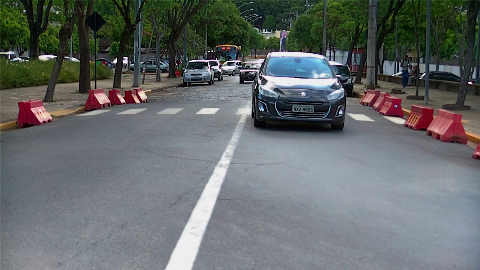

In [5]:
img = Image.open('/media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00003.png')
img

## Get predictions

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:            # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
!export CUDA_VISIBLE_DEVICES=""

In [2]:
from ISR.models import RRDN

rrdn = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':2})
rrdn.model.load_weights('/home/jhonatan/Documents/TCC/image-super-resolution/weights/rrdn-C4-D3-G64-G064-T10-x2/2020-09-21_2142/rrdn-C4-D3-G64-G064-T10-x2_best-val_generator_loss_epoch099.hdf5')


1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs


In [4]:
from ISR.models import RDN

rdn = RDN(arch_params={'C':6, 'D':20, 'G':64, 'G0':64, 'x'2})
rdn.model.load_weights('/home/jhonatan/Documents/TCC/image-super-resolution/weights/rdn-C6-D20-G64-G064-x2/2020-09-25_1203/rdn-C6-D20-G64-G064-x2_best-val_generator_loss_epoch064.hdf5')


In [3]:
from ISR.models import RDN

rdn = RDN(arch_params={'C':6, 'D':20, 'G':64, 'G0':64, 'x':4})
rdn.model.load_weights('/home/jhonatan/Documents/TCC/image-super-resolution/weights/rdn-C6-D20-G64-G064-x4/2020-10-13_2224/rdn-C6-D20-G64-G064-x4_epoch406.hdf5')


1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs


In [3]:
from ISR.models import RRDN

rdn = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':4})
rdn.model.load_weights('/home/jhonatan/Documents/TCC/image-super-resolution/weights/rrdn-C4-D3-G64-G064-T10-x4/2020-10-13_0834/rrdn-C4-D3-G64-G064-T10-x4_epoch397.hdf5')


1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs


#### Prediction

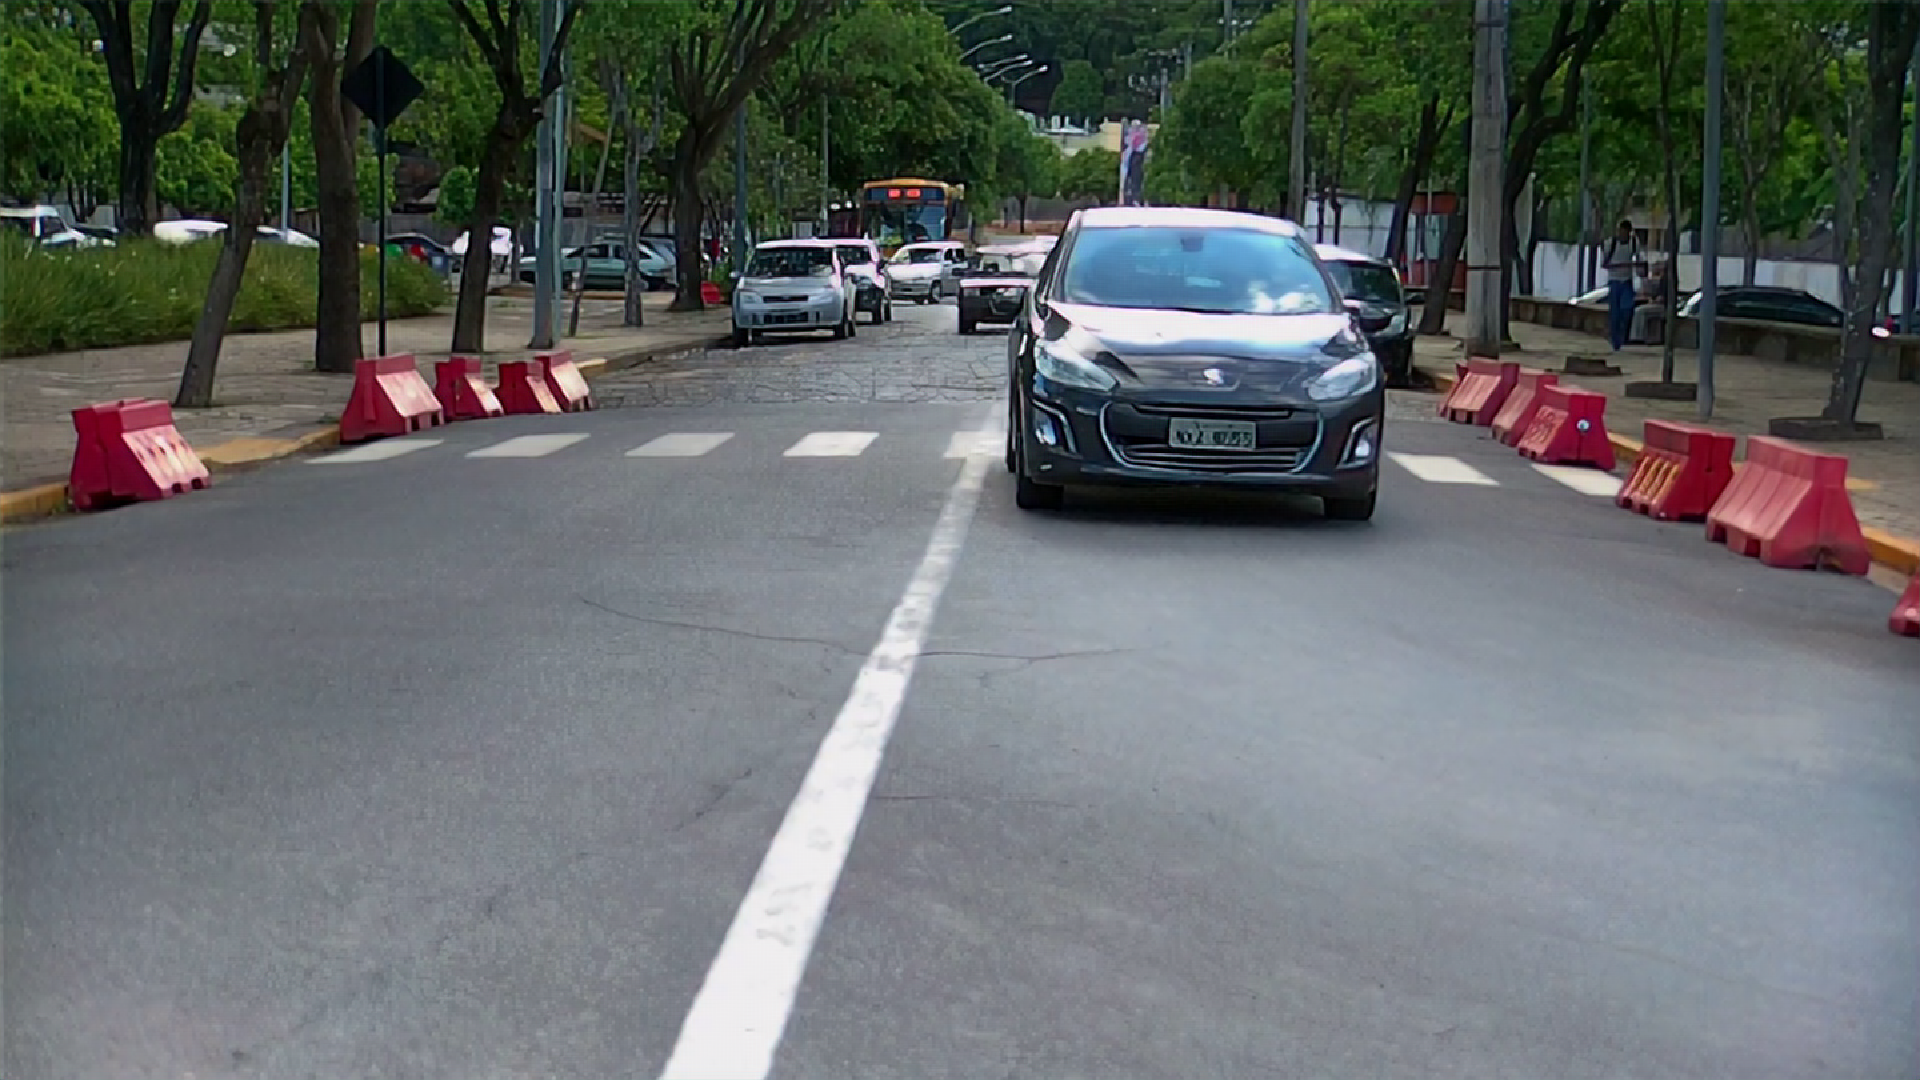

In [6]:
sr_img = rdn.predict(np.array(img))
Image.fromarray(sr_img)

In [7]:
sr_img = Image.fromarray(sr_img)
sr_img.save('/media/jhonatan/Data/h6f86gl(2)/final/00003_rdnX4.png')

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [8]:
from ISR.predict import Predictor
import ISR.utils.metrics

predictor = Predictor(input_dir='/media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/', output_dir='/media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/')
predictor.get_predictions(model=rdn, weights_path='/home/jhonatan/Documents/TCC/image-super-resolution/weights/rdn-C6-D20-G64-G064-x4/2020-10-13_2224/rdn-C6-D20-G64-G064-x4_epoch406.hdf5')

Loaded weights from 
 > /home/jhonatan/Documents/TCC/image-super-resolution/weights/rdn-C6-D20-G64-G064-x4/2020-10-13_2224/rdn-C6-D20-G64-G064-x4_epoch406.hdf5
Results in:
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00803.png
Elapsed time: 1.136509895324707s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00803.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01558.png
Elapsed time: 1.2723643779754639s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01558.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00000.png
Elapsed time: 1.1635847091674805s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00000.png
Processing file
 > /media/jhonatan/Data/h6f

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00034.png
Elapsed time: 1.0917859077453613s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00034.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00035.png
Elapsed time: 1.1744091510772705s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00035.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00036.png
Elapsed time: 1.1133551597595215s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00036.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00037.png
Elapsed time: 1.1027727127075195s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00037.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00038.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00252.png
Elapsed time: 1.0834591388702393s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00252.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00253.png
Elapsed time: 1.112769603729248s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00253.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00254.png
Elapsed time: 1.1051161289215088s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00254.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00255.png
Elapsed time: 1.1230511665344238s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00255.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00256.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00232.png
Elapsed time: 1.1030423641204834s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00232.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00233.png
Elapsed time: 1.10184645652771s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00233.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00234.png
Elapsed time: 1.09743332862854s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00234.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00235.png
Elapsed time: 1.0932838916778564s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00235.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00236.png
Elapsed ti

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00707.png
Elapsed time: 1.1316518783569336s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00707.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00728.png
Elapsed time: 1.1187481880187988s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00728.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00757.png
Elapsed time: 1.1301453113555908s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00757.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00778.png
Elapsed time: 1.3580772876739502s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00778.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00163.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00128.png
Elapsed time: 1.1052653789520264s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00128.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00129.png
Elapsed time: 1.1136219501495361s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00129.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00130.png
Elapsed time: 1.1016080379486084s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00130.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00131.png
Elapsed time: 1.1042699813842773s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00131.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00132.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00602.png
Elapsed time: 1.093050479888916s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00602.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00603.png
Elapsed time: 1.1107063293457031s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00603.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00604.png
Elapsed time: 1.1054158210754395s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00604.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00605.png
Elapsed time: 1.1115531921386719s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00605.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00606.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00510.png
Elapsed time: 1.1779770851135254s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00510.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00511.png
Elapsed time: 1.1439402103424072s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00511.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00512.png
Elapsed time: 1.1132020950317383s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00512.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00513.png
Elapsed time: 1.1090075969696045s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00513.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00514.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00498.png
Elapsed time: 1.1053073406219482s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00498.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00499.png
Elapsed time: 1.0953941345214844s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00499.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00500.png
Elapsed time: 1.0922136306762695s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00500.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00501.png
Elapsed time: 1.111682415008545s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00501.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00502.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00393.png
Elapsed time: 1.0967652797698975s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00393.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00394.png
Elapsed time: 1.109407901763916s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00394.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00395.png
Elapsed time: 1.1027028560638428s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00395.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00396.png
Elapsed time: 1.1087956428527832s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00396.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00397.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00893.png
Elapsed time: 1.0940828323364258s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00893.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00894.png
Elapsed time: 1.115147590637207s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00894.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00895.png
Elapsed time: 1.0857157707214355s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00895.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00896.png
Elapsed time: 1.1559333801269531s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00896.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00897.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00882.png
Elapsed time: 1.1500723361968994s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00882.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00883.png
Elapsed time: 1.1009602546691895s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00883.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00884.png
Elapsed time: 1.3035504817962646s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00884.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00885.png
Elapsed time: 1.0984680652618408s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00885.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00804.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00770.png
Elapsed time: 1.1031956672668457s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00770.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00771.png
Elapsed time: 1.0946311950683594s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00771.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00772.png
Elapsed time: 1.09600830078125s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00772.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00773.png
Elapsed time: 1.0910038948059082s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00773.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00774.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00675.png
Elapsed time: 1.127687931060791s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00675.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00676.png
Elapsed time: 1.1061224937438965s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00676.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00677.png
Elapsed time: 1.343665361404419s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00677.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00678.png
Elapsed time: 1.1099488735198975s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00678.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00679.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01148.png
Elapsed time: 1.0988905429840088s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01148.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01149.png
Elapsed time: 1.10569167137146s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01149.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01150.png
Elapsed time: 1.1111609935760498s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01150.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01151.png
Elapsed time: 1.1148359775543213s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01151.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01152.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01127.png
Elapsed time: 1.0833308696746826s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01127.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01128.png
Elapsed time: 1.0883369445800781s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01128.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01129.png
Elapsed time: 1.1032052040100098s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01129.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01130.png
Elapsed time: 1.2506921291351318s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01130.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01131.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01009.png
Elapsed time: 1.0880060195922852s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01009.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01010.png
Elapsed time: 1.098498821258545s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01010.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01011.png
Elapsed time: 1.1085834503173828s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01011.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01012.png
Elapsed time: 1.1076443195343018s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01012.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01013.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00993.png
Elapsed time: 1.1036195755004883s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00993.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00994.png
Elapsed time: 1.105980634689331s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00994.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00995.png
Elapsed time: 1.0897057056427002s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00995.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00996.png
Elapsed time: 1.1090545654296875s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00996.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00997.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01233.png
Elapsed time: 1.4639983177185059s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01233.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01234.png
Elapsed time: 1.1486916542053223s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01234.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01235.png
Elapsed time: 1.0824565887451172s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01235.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01236.png
Elapsed time: 1.1146769523620605s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01236.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01237.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01501.png
Elapsed time: 1.0940055847167969s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01501.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01502.png
Elapsed time: 1.1134145259857178s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01502.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01503.png
Elapsed time: 1.1009407043457031s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01503.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01504.png
Elapsed time: 1.0821034908294678s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01504.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01505.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01395.png
Elapsed time: 1.1043305397033691s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01395.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01396.png
Elapsed time: 1.0943336486816406s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01396.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01397.png
Elapsed time: 1.1088378429412842s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01397.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01398.png
Elapsed time: 1.1057226657867432s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01398.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01399.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01374.png
Elapsed time: 1.0925531387329102s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01374.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01375.png
Elapsed time: 1.092824935913086s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01375.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01376.png
Elapsed time: 1.1244094371795654s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01376.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01377.png
Elapsed time: 1.1992998123168945s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01377.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01378.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01337.png
Elapsed time: 1.1087329387664795s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01337.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01338.png
Elapsed time: 1.100877046585083s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01338.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01339.png
Elapsed time: 1.0973389148712158s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01339.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01340.png
Elapsed time: 1.0964558124542236s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01340.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01341.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01300.png
Elapsed time: 1.1972451210021973s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01300.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01301.png
Elapsed time: 1.105111837387085s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01301.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01302.png
Elapsed time: 1.1699960231781006s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01302.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01303.png
Elapsed time: 1.089656114578247s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01303.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01304.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01770.png
Elapsed time: 1.2573490142822266s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01770.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01771.png
Elapsed time: 1.09590482711792s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01771.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01772.png
Elapsed time: 1.1095492839813232s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01772.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01773.png
Elapsed time: 1.1707484722137451s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01773.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01774.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01735.png
Elapsed time: 1.1573998928070068s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01735.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01736.png
Elapsed time: 1.0882301330566406s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01736.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01737.png
Elapsed time: 1.0997087955474854s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01737.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01738.png
Elapsed time: 1.09255051612854s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01738.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01739.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01701.png
Elapsed time: 1.105062484741211s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01701.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01702.png
Elapsed time: 1.1019346714019775s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01702.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01703.png
Elapsed time: 1.0981671810150146s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01703.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01704.png
Elapsed time: 1.0964031219482422s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01704.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01705.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01469.png
Elapsed time: 1.1001472473144531s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01469.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01508.png
Elapsed time: 1.1633248329162598s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01508.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01528.png
Elapsed time: 1.1107683181762695s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01528.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01645.png
Elapsed time: 1.1684999465942383s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01645.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01646.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01606.png
Elapsed time: 1.1088273525238037s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01606.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01607.png
Elapsed time: 1.106804609298706s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01607.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01608.png
Elapsed time: 1.111422061920166s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01608.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01609.png
Elapsed time: 1.0974211692810059s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01609.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01610.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02077.png
Elapsed time: 1.1274971961975098s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02077.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02078.png
Elapsed time: 1.160576343536377s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02078.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02079.png
Elapsed time: 1.1036865711212158s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02079.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02080.png
Elapsed time: 1.0998499393463135s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02080.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02081.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02047.png
Elapsed time: 1.099442958831787s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02047.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01993.png
Elapsed time: 1.3454740047454834s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01993.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01994.png
Elapsed time: 1.0929696559906006s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01994.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01995.png
Elapsed time: 1.113083839416504s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01995.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01996.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01951.png
Elapsed time: 1.0876190662384033s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01951.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01952.png
Elapsed time: 1.1999073028564453s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01952.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01953.png
Elapsed time: 1.09354567527771s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01953.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01954.png
Elapsed time: 1.1160118579864502s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01954.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01955.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01907.png
Elapsed time: 1.1708002090454102s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01907.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01908.png
Elapsed time: 1.086319923400879s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01908.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01837.png
Elapsed time: 1.1669228076934814s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01837.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01838.png
Elapsed time: 1.0968658924102783s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01838.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01839.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00081.png
Elapsed time: 1.0960052013397217s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00081.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00082.png
Elapsed time: 1.0934383869171143s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00082.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00083.png
Elapsed time: 1.1590189933776855s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00083.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00084.png
Elapsed time: 1.0983636379241943s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00084.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02096.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02330.png
Elapsed time: 1.0995168685913086s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02330.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02331.png
Elapsed time: 1.1035115718841553s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02331.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02332.png
Elapsed time: 1.3259196281433105s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02332.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02333.png
Elapsed time: 1.1051347255706787s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02333.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02334.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02287.png
Elapsed time: 1.0764718055725098s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02287.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02288.png
Elapsed time: 1.3205044269561768s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02288.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02289.png
Elapsed time: 1.1051857471466064s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02289.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02290.png
Elapsed time: 1.1075997352600098s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02290.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02291.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02265.png
Elapsed time: 1.1048791408538818s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02265.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02266.png
Elapsed time: 1.0962715148925781s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02266.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02267.png
Elapsed time: 1.0830039978027344s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02267.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02268.png
Elapsed time: 1.088386058807373s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02268.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02269.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02161.png
Elapsed time: 1.1160366535186768s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02161.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02162.png
Elapsed time: 1.098564863204956s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02162.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02163.png
Elapsed time: 1.1018648147583008s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02163.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02164.png
Elapsed time: 1.0922844409942627s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02164.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02165.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00371.png
Elapsed time: 1.1153228282928467s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00371.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00372.png
Elapsed time: 1.0980494022369385s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00372.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00373.png
Elapsed time: 1.110288143157959s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00373.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00374.png
Elapsed time: 1.0992357730865479s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00374.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00375.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00092.png
Elapsed time: 1.0967788696289062s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00092.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00093.png
Elapsed time: 1.1316380500793457s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00093.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00094.png
Elapsed time: 1.0961697101593018s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00094.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00095.png
Elapsed time: 1.105696201324463s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00095.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00096.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00651.png
Elapsed time: 1.1113958358764648s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00651.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00652.png
Elapsed time: 1.1181056499481201s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00652.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00653.png
Elapsed time: 1.1144564151763916s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00653.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00654.png
Elapsed time: 1.1006650924682617s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00654.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00655.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00425.png
Elapsed time: 1.0979695320129395s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00425.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00426.png
Elapsed time: 1.1023714542388916s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00426.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00427.png
Elapsed time: 1.0910496711730957s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00427.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00428.png
Elapsed time: 1.140967607498169s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00428.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00429.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00832.png
Elapsed time: 1.171525001525879s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00832.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00833.png
Elapsed time: 1.086623191833496s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00833.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00834.png
Elapsed time: 1.1770386695861816s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00834.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00835.png
Elapsed time: 1.1171329021453857s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00835.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00836.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00788.png
Elapsed time: 1.1007800102233887s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00788.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00789.png
Elapsed time: 1.0965368747711182s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00789.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00790.png
Elapsed time: 1.1162211894989014s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00790.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00791.png
Elapsed time: 1.0809485912322998s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00791.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00792.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00750.png
Elapsed time: 1.10007643699646s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00750.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00751.png
Elapsed time: 1.1047141551971436s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00751.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00752.png
Elapsed time: 1.1551384925842285s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00752.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00753.png
Elapsed time: 1.1095538139343262s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00753.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00754.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01889.png
Elapsed time: 1.1793851852416992s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01889.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01909.png
Elapsed time: 1.1135270595550537s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01909.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01929.png
Elapsed time: 1.4081315994262695s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01929.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01950.png
Elapsed time: 1.1022377014160156s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01950.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01970.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01179.png
Elapsed time: 1.1284592151641846s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01179.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01180.png
Elapsed time: 1.0964069366455078s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01180.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01181.png
Elapsed time: 1.104527473449707s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01181.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01182.png
Elapsed time: 1.105562448501587s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01182.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01183.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01097.png
Elapsed time: 1.0870654582977295s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01097.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01098.png
Elapsed time: 1.3185336589813232s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01098.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01099.png
Elapsed time: 1.1452229022979736s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01099.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01100.png
Elapsed time: 1.1095116138458252s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01100.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01101.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01514.png
Elapsed time: 1.094233512878418s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01514.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01515.png
Elapsed time: 1.1664741039276123s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01515.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01516.png
Elapsed time: 1.0931422710418701s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01516.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01517.png
Elapsed time: 1.3480737209320068s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01517.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01518.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01551.png
Elapsed time: 1.1738827228546143s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01551.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01552.png
Elapsed time: 1.0993969440460205s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01552.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01553.png
Elapsed time: 1.1704204082489014s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01553.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01554.png
Elapsed time: 1.1037828922271729s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01554.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01555.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01886.png
Elapsed time: 1.1092700958251953s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01886.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01887.png
Elapsed time: 1.086411714553833s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01887.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01888.png
Elapsed time: 1.1145820617675781s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01888.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01810.png
Elapsed time: 1.1601665019989014s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01810.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01811.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01792.png
Elapsed time: 1.1044800281524658s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01792.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01793.png
Elapsed time: 1.2132062911987305s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01793.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01794.png
Elapsed time: 1.0980324745178223s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01794.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01795.png
Elapsed time: 1.0961511135101318s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01795.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01796.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02050.png
Elapsed time: 1.0962953567504883s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02050.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02051.png
Elapsed time: 1.0870866775512695s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02051.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02052.png
Elapsed time: 1.1175074577331543s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02052.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02053.png
Elapsed time: 1.0986254215240479s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02053.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02054.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01921.png
Elapsed time: 1.1089041233062744s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01921.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01922.png
Elapsed time: 1.0984554290771484s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01922.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01923.png
Elapsed time: 1.09605073928833s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01923.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01924.png
Elapsed time: 1.0811598300933838s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01924.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01925.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00268.png
Elapsed time: 1.0947861671447754s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00268.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00269.png
Elapsed time: 1.081712245941162s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00269.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00270.png
Elapsed time: 1.3316655158996582s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00270.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00271.png
Elapsed time: 1.1022701263427734s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00271.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00272.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00200.png
Elapsed time: 1.0982027053833008s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00200.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00201.png
Elapsed time: 1.1031696796417236s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00201.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00135.png
Elapsed time: 1.0781433582305908s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00135.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00136.png
Elapsed time: 1.103083848953247s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00136.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00137.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00047.png
Elapsed time: 1.1819159984588623s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00047.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00048.png
Elapsed time: 1.0995287895202637s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00048.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00049.png
Elapsed time: 1.1882984638214111s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00049.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00050.png
Elapsed time: 1.1055190563201904s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00050.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00051.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02237.png
Elapsed time: 1.1226739883422852s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02237.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02238.png
Elapsed time: 1.1105155944824219s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02238.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02239.png
Elapsed time: 1.164269208908081s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02239.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02240.png
Elapsed time: 1.100034236907959s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02240.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01027.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00584.png
Elapsed time: 1.113295316696167s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00584.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00585.png
Elapsed time: 1.1076197624206543s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00585.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00586.png
Elapsed time: 1.0955431461334229s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00586.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00587.png
Elapsed time: 1.120828628540039s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00587.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00588.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00688.png
Elapsed time: 1.0945751667022705s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00688.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00689.png
Elapsed time: 1.1086516380310059s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00689.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00690.png
Elapsed time: 1.0992939472198486s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00690.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00691.png
Elapsed time: 1.100313663482666s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00691.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00692.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00925.png
Elapsed time: 1.1102955341339111s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00925.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00926.png
Elapsed time: 1.107771635055542s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00926.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00455.png
Elapsed time: 1.0989699363708496s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00455.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00456.png
Elapsed time: 1.1047964096069336s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/00456.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/00457.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01634.png
Elapsed time: 1.0828266143798828s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01634.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01635.png
Elapsed time: 1.1645915508270264s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01635.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01636.png
Elapsed time: 1.0915274620056152s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01636.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01637.png
Elapsed time: 1.108351707458496s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01637.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01638.png
Elapsed

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01454.png
Elapsed time: 1.1329772472381592s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01454.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01455.png
Elapsed time: 1.0912127494812012s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01455.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01456.png
Elapsed time: 1.1569130420684814s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01456.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01457.png
Elapsed time: 1.1096339225769043s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01457.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01458.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01242.png
Elapsed time: 1.0985093116760254s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01242.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01243.png
Elapsed time: 1.1073062419891357s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01243.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01244.png
Elapsed time: 1.1008155345916748s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01244.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01245.png
Elapsed time: 1.1129469871520996s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01245.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01246.png
Elapse

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02180.png
Elapsed time: 1.1047236919403076s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02180.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02181.png
Elapsed time: 1.09682297706604s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02181.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02182.png
Elapsed time: 1.1117863655090332s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02182.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02183.png
Elapsed time: 1.0906879901885986s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/02183.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/02184.png
Elapsed 

Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01971.png
Elapsed time: 1.091461181640625s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01971.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01972.png
Elapsed time: 1.0928735733032227s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01972.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01973.png
Elapsed time: 1.1192326545715332s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01973.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01974.png
Elapsed time: 1.1124215126037598s
Result in: /media/jhonatan/Data/h6f86gl(2)/final/X4/sr_test/lr_test/rdn-C6-D20-G64-G064-x4/2020-10-18_2239/01974.png
Processing file
 > /media/jhonatan/Data/h6f86gl(2)/final/X4/lr_test/01975.png
Elapsed

###### 